In [133]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [134]:
# Function for observed data
def readObsData(file):
    
    df = pd.read_csv(file)
    
    df['datetime'] = pd.to_datetime(df.iloc[:,0] +' '+df.iloc[:,1],dayfirst=True)
    
    df['C(kg/m3)'] = df['AB07CC0030 (Grid 1325) (mg/l)']*1e-3
    df['L(tonn/day)'] = df['observed_load (mg/s)']/11574. #convert to metric tonn/day
    
    df = df.set_index('datetime')
    #df['YEAR'].map(str)+'-'+df['JDAYi'].map(str)
    #print(df.index)
    
    return(df)

In [135]:
#Read observed sediment load
dir_obs = '...Path_name'
filename_obs = 'Station_AB07CC0030_raw_dataObs.csv' 
    
df_obs = readObsData(os.path.join(dir_obs,filename_obs))

In [137]:
#Function for simulated sediment load
def readSimData(file):
    
    #df = pd.read_csv(file, header=None)
    df = pd.read_csv(file,skiprows=1)

    df.iloc[:,0] = df.iloc[:,0].map(lambda x: x.replace('"',''))

    
    
    df['datetime'] = pd.to_datetime(df.iloc[:,0], format='%Y/%m/%d %H:%M:%S.%f',dayfirst=True) #"2003/01/01 00:30:00.000"
    
    df['L(tonn/day)'] = (df.iloc[:,7]*df.iloc[:,9])*86.4 #convert to metric tonn/day
    
    df = df.set_index('datetime')
    
    #print(df)
    
    return(df)

In [138]:
#Read simulated sediment load
dir_sim = '...Path_name'
filename_sim = 'ts_1325save_final.out'
    
df_sim = readSimData(os.path.join(dir_sim,filename_sim))
    

In [142]:
#For NSE calculation from log 10 scale 
dfs=np.log10(df_sim['L(tonn/day)']).resample('D').mean() #convert to log 10 scale
dfo=np.log10(df_obs['L(tonn/day)']).resample('D').mean()
start='2002-02-01'
end='2015-11-18'
s1=dfs[start:end].values
o1=dfo[start:end].values
s5=1-np.nansum((s1-o1)**2)/np.nansum((o1-np.nanmean(o1))**2)
print "log NSE is:",s5

log NSE is: 0.734144314763


In [131]:
#This scripts calculate other metrices (like logNSE, PBIAS and R sqaure)
# #calculate logNSE
# dfs=(df_sim['L(tonn/day)']).resample('D').mean()#convert to log 10 scale
# dfo=(df_obs['L(tonn/day)']).resample('D').mean()
# start='2002-02-01'
# end='2015-11-18'
# s1=dfs[start:end].values
# o1=dfo[start:end].values
# lnNSE=1-np.nansum((np.log(s1)-np.log(o1))**2)/np.nansum((np.log(o1)-np.nanmean(np.log(o1)))**2)
# print "logNSE is:",lnNSE
# #calculate PBIAS
# Pbias= ((np.nansum(o1 - s1 )) * 100) / np.nansum (o1)
# print "Pbias is:", Pbias
# #calculate R square
# mask = ~np.isnan(o1) & ~np.isnan(s1)
# res = stats.linregress(o1[mask],s1[mask])
# print "R square is:", res.rvalue**2

logNSE is: 0.733828397127
Pbias is: 33.6405811208
R square is: 0.519708585066


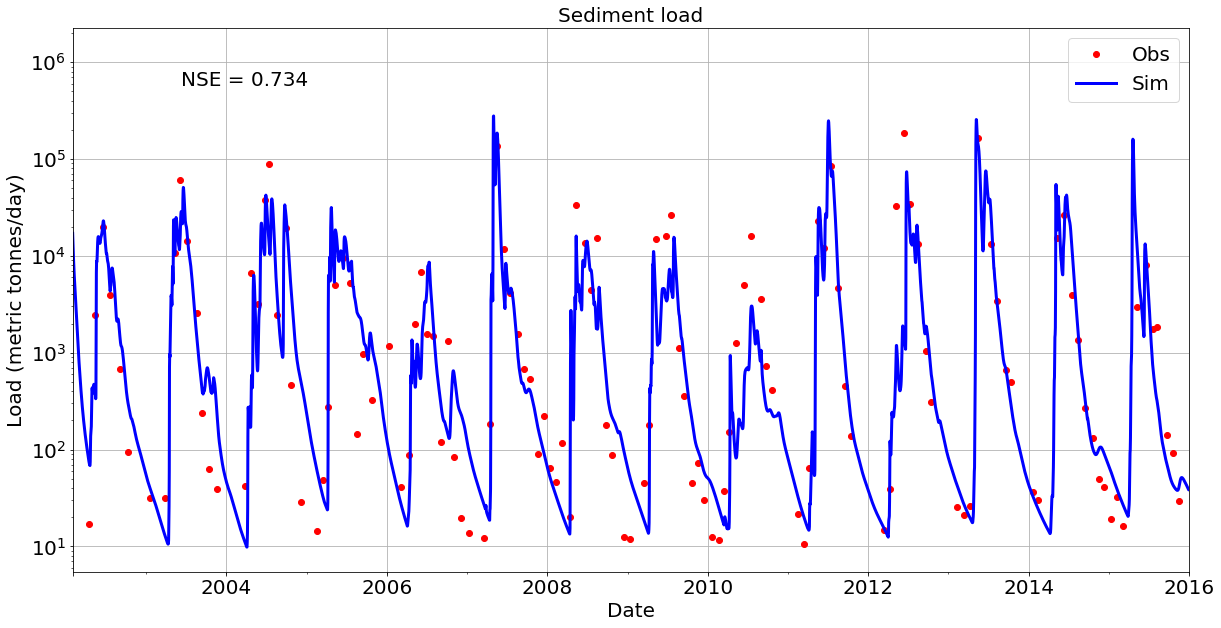

In [146]:
#plotting obs and sim sediment load
fig=plt.figure(figsize=(20,10))
dfoo=10**dfo #convert back to values
dfoo.plot(marker='o', linestyle='None', color='Red',label='Obs')
dfss=10**dfs #convert back to values
dfss.plot(linewidth=3,label='Sim',color='Blue')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Load (metric tonnes/day)', fontsize=20)
plt.grid('on')

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.xlim([datetime.date(2002, 2, 1), datetime.date(2016, 1, 1)])
#plt.ylim([0,300000])
plt.legend(fontsize=20)
plt.yscale('log')
textstr2='NSE = %.3f'%s5
fig.text(0.2, 0.8, textstr2, fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title("Sediment load", fontsize=20)
plt.grid('on')
#fig.savefig('Load_new.png')